# Hierarchical clustering Analysis of Qualitatives variables (VARQUALHCA)

In [1]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
vote = pd.read_excel("vote_clustering.xlsx")
vote.head()


,affiliation,budget,physician,salvador,nicaraguan,missile,education
0,republican,n,y,y,n,n,y
1,republican,n,y,y,n,n,y
2,democrat,y,neither,y,n,n,n
3,democrat,y,n,neither,n,n,n
4,democrat,y,n,y,n,n,neither


In [2]:
#variables actives
X = vote.iloc[:,1:]
print(X.columns)

Index(['budget', 'physician', 'salvador', 'nicaraguan', 'missile',
       'education'],
      dtype='object')


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   budget      435 non-null    object
 1   physician   435 non-null    object
 2   salvador    435 non-null    object
 3   nicaraguan  435 non-null    object
 4   missile     435 non-null    object
 5   education   435 non-null    object
dtypes: object(6)
memory usage: 20.5+ KB


In [4]:
# Importation de la fonction
from scientisttools.clustering import CATVARHCA
from scientisttools.pyplot import plot_dendrogram
import matplotlib.pyplot as plt
# Set figure size
plt.rcParams['figure.figsize'] = [16,16]

### CAH sur les variables : V de Cramer

#### Matrice originale

In [5]:
# Construction du model
catvarhca = CATVARHCA(n_clusters=2,
                      var_labels=list(X.columns),
                      diss_metric="cramer",
                      matrix_type="completed",
                      metric="euclidean",
                      method="ward",
                      parallelize=True)
# Instanciation
catvarhca.fit(X)

CATVARHCA(n_clusters=2, parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [6]:
#Dissimilarity matrix
catvarhca.diss_matrix_

,budget,physician,salvador,nicaraguan,missile,education
budget,0.000000,0.360782,0.493170,0.482666,0.561172,0.524634
physician,0.360782,0.000000,0.423504,0.482176,0.528899,0.491124
salvador,0.493170,0.423504,0.000000,0.388881,0.442139,0.530398
nicaraguan,0.482666,0.482176,0.388881,0.000000,0.454786,0.531160
missile,0.561172,0.528899,0.442139,0.454786,0.000000,0.573338
education,0.524634,0.491124,0.530398,0.531160,0.573338,0.000000


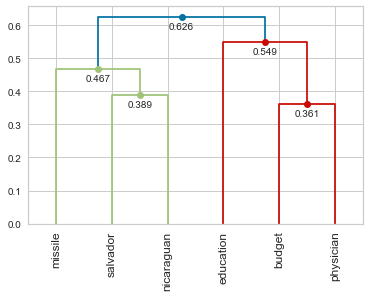

In [7]:
plot_dendrogram(catvarhca,orientation='top',leaf_rotation=90,color_threshold=0.6)
plt.show()

In [8]:
# Positionner les variables supplémentaires
Xsup =  vote.iloc[:,0]
catvarhca.transform(Xsup)

,affiliation
cluster,
cluster_1,0.780505
cluster_2,0.666967


#### Matrice Disjonctif

In [9]:
# Dummies DataFrame
disj = pd.get_dummies(X,prefix_sep='_',drop_first=False)
catvarhca2 = CATVARHCA(n_clusters=2,
                       var_labels=list(X.columns),
                       diss_metric="cramer",
                       matrix_type="disjonctif",
                       metric="euclidean",
                       method="ward",
                       parallelize=True)
# Instanciation
catvarhca2.fit(disj)

CATVARHCA(matrix_type='disjonctif', n_clusters=2, parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [10]:
#
catvarhca2.diss_matrix_

,budget,physician,salvador,nicaraguan,missile,education
budget,0.000000,0.360782,0.493170,0.482666,0.561172,0.524634
physician,0.360782,0.000000,0.423504,0.482176,0.528899,0.491124
salvador,0.493170,0.423504,0.000000,0.388881,0.442139,0.530398
nicaraguan,0.482666,0.482176,0.388881,0.000000,0.454786,0.531160
missile,0.561172,0.528899,0.442139,0.454786,0.000000,0.573338
education,0.524634,0.491124,0.530398,0.531160,0.573338,0.000000


Les matrices de dissimilarité sont identiques

In [11]:
Xsupdisj = pd.get_dummies(Xsup,prefix=Xsup.name,prefix_sep='_',drop_first=False)
catvarhca2.transform(Xsupdisj)

,affiliation
cluster,
cluster_1,0.780505
cluster_2,0.666967


### CAH sur les modalités : Indice de Dice

#### Matrice originale

In [12]:
catvarhca3 = CATVARHCA(n_clusters=3,
                       var_labels=list(X.columns),
                       diss_metric="dice",
                       matrix_type="completed",
                       metric="euclidean",
                       method="average",
                       parallelize=True)
# Instanciation
catvarhca3.fit(X)

CATVARHCA(diss_metric='dice', method='average', n_clusters=3, parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [13]:
catvarhca3.diss_matrix_.iloc[:5,:5]

,budget_n,budget_neither,budget_y,physician_n,physician_neither
budget_n,0.000000,9.539392,14.560220,13.564660,9.539392
budget_neither,9.539392,0.000000,11.489125,11.224972,2.236068
budget_y,14.560220,11.489125,0.000000,5.567764,11.269428
physician_n,13.564660,11.224972,5.567764,0.000000,11.357817
physician_neither,9.539392,2.236068,11.269428,11.357817,0.000000


In [14]:
catvarhca3.cluster_infos_

,n(k),p(k)
cluster,,
cluster_1,6,0.333333
cluster_2,6,0.333333
cluster_3,6,0.333333


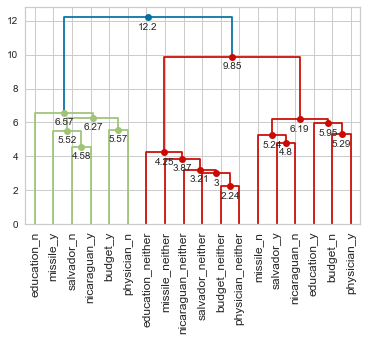

In [15]:
plot_dendrogram(catvarhca3,orientation='top',leaf_rotation=90,color_threshold=10)

In [16]:
catvarhca3.distances_

array([ 2.23606798,  3.        ,  3.2137267 ,  3.87141972,  4.24975336,
        4.58257569,  4.79583152,  5.23861279,  5.29150262,  5.51970813,
        5.56776436,  5.95448832,  6.18592755,  6.27259959,  6.56721213,
        9.85037614, 12.20101371])

In [17]:
catvarhca3.cluster_

,cluster
budget_n,cluster_1
budget_neither,cluster_2
budget_y,cluster_3
physician_n,cluster_3
physician_neither,cluster_2
physician_y,cluster_1
salvador_n,cluster_3
salvador_neither,cluster_2
salvador_y,cluster_1
nicaraguan_n,cluster_1


In [18]:
# Position de la variable supplémentaire
import numpy as np
np.sqrt(catvarhca3.transform(Xsup))

,affiliation_democrat,affiliation_republican
cluster,,
cluster_1,13.659551,5.560276
cluster_2,11.441882,9.305017
cluster_3,5.787918,13.564660


#### Tableau disjonctif complet

In [19]:
catvarhca4 = CATVARHCA(n_clusters=3,
                       var_labels=list(X.columns),
                       diss_metric="dice",
                       matrix_type="disjonctif",
                       metric="euclidean",
                       method="ward",
                       parallelize=True)
# Instanciation
catvarhca4.fit(disj)

CATVARHCA(diss_metric='dice', matrix_type='disjonctif', n_clusters=3,
          parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [20]:
# Projection de la variable supplémentaire
catvarhca4.transform(Xsupdisj)

,affiliation_democrat,affiliation_republican
cluster,,
cluster_1,186.583333,30.916667
cluster_2,130.916667,86.583333
cluster_3,33.500000,184.000000


### CAH sur les modalités : bothpos

#### Matrice originale

In [21]:
catvarhca5 = CATVARHCA(n_clusters=3,
                       var_labels=list(X.columns),
                       diss_metric="bothpos",
                       matrix_type="completed",
                       metric="euclidean",
                       method="average",
                       parallelize=True)
# Instanciation
catvarhca5.fit(X)

CATVARHCA(diss_metric='bothpos', method='average', n_clusters=3,
          parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [22]:
catvarhca5.diss_matrix_

,budget_n,budget_neither,budget_y,physician_n,physician_neither,physician_y,salvador_n,salvador_neither,salvador_y,nicaraguan_n,nicaraguan_neither,nicaraguan_y,missile_n,missile_neither,missile_y,education_n,education_neither,education_y
budget_n,0.000000,1.000000,1.000000,0.942529,1.000000,0.664368,0.963218,0.995402,0.648276,0.678161,0.981609,0.947126,0.664368,0.990805,0.951724,0.935632,0.977011,0.694253
budget_neither,1.000000,0.000000,1.000000,0.993103,0.986207,0.995402,0.990805,0.990805,0.993103,0.990805,0.993103,0.990805,0.993103,0.995402,0.986207,0.990805,0.990805,0.993103
budget_y,1.000000,1.000000,0.000000,0.496552,0.988506,0.933333,0.567816,0.979310,0.871264,0.921839,0.990805,0.505747,0.868966,0.963218,0.586207,0.537931,0.960920,0.919540
physician_n,0.942529,0.993103,0.496552,0.000000,1.000000,1.000000,0.551724,0.977011,0.903448,0.924138,0.993103,0.514943,0.889655,0.956322,0.586207,0.535632,0.963218,0.933333
physician_neither,1.000000,0.986207,0.988506,1.000000,0.000000,1.000000,0.988506,0.990805,0.995402,0.995402,0.993103,0.986207,0.990805,0.995402,0.988506,0.986207,0.990805,0.997701
physician_y,0.664368,0.995402,0.933333,1.000000,1.000000,0.000000,0.981609,0.997701,0.613793,0.671264,0.979310,0.942529,0.645977,0.997701,0.949425,0.942529,0.974713,0.675862
salvador_n,0.963218,0.990805,0.567816,0.551724,0.988506,0.981609,0.000000,1.000000,1.000000,0.995402,0.995402,0.531034,0.963218,0.970115,0.588506,0.593103,0.972414,0.956322
salvador_neither,0.995402,0.990805,0.979310,0.977011,0.990805,0.997701,1.000000,0.000000,1.000000,0.990805,0.990805,0.983908,0.986207,0.995402,0.983908,0.983908,0.988506,0.993103
salvador_y,0.648276,0.993103,0.871264,0.903448,0.995402,0.613793,1.000000,1.000000,0.000000,0.604598,0.979310,0.928736,0.577011,0.983908,0.951724,0.887356,0.967816,0.657471
nicaraguan_n,0.678161,0.990805,0.921839,0.924138,0.995402,0.671264,0.995402,0.990805,0.604598,0.000000,1.000000,1.000000,0.627586,0.990805,0.972414,0.917241,0.977011,0.696552


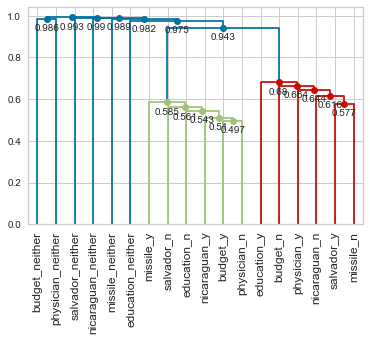

In [23]:
plot_dendrogram(catvarhca5,orientation='top',leaf_rotation=90)

In [24]:
# Position de la variable supplémentaire
catvarhca5.transform(Xsup)

,affiliation_democrat,affiliation_republican
cluster,,
cluster_1,0.758621,0.847050
cluster_2,0.982759,0.991954
cluster_3,0.972414,0.993103


#### Matrice disjonctif

In [25]:
catvarhca6 = CATVARHCA(n_clusters=3,
                       var_labels=list(X.columns),
                       diss_metric="bothpos",
                       matrix_type="disjonctif",
                       metric="euclidean",
                       method="ward",
                       parallelize=True)
# Instanciation
catvarhca6.fit(disj)

CATVARHCA(diss_metric='bothpos', matrix_type='disjonctif', n_clusters=3,
          parallelize=True,
          var_labels=['budget', 'physician', 'salvador', 'nicaraguan',
                      'missile', 'education'])

In [26]:
# Position de la variable supplémentaire
catvarhca6.transform(Xsupdisj)

,affiliation_democrat,affiliation_republican
cluster,,
cluster_1,0.908429,0.664368
cluster_2,0.973946,0.985824
cluster_3,0.503831,0.963602
